In [1]:
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import re
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

In [2]:
path_1 = r"C:\Users\Samsung\jupyter\Project_Medical_Legal\data"

fn_dic = {}
os.chdir(path_1)
tq = tqdm(os.listdir())
for path_ in tq:
    print(path_)
    try:
        path_2 = path_1 + "\\" + path_ + "\\splits"
        os.chdir(path_2)
        fn_list = []
        for i in os.listdir():
            if i.endswith(".txt"):
                fn_ = i.replace(".txt","")
                fn_list.append(fn_)
                #print(fn_)
                f = open(path_2+"\\"+i, 'rt',encoding="utf-8")
                globals ()["{}".format(fn_)] = ""
                while True:
                    line = f.readline()
                    if not line: break
                    globals ()["{}".format(fn_)] = globals ()["{}".format(fn_)] + line
                    #print(line)
                f.close()
        fn_dic[path_] = fn_list
        os.chdir(path_1)
    except:
        print("error")
        pass
    

  0%|          | 0/12 [00:00<?, ?it/s]

20220902
20220907
20220919
20220919_2
20220923
20221018
20221026
20221030
20221110
20221110.zip
error
pdf
error
미추출도서_221108.zip
error


In [4]:
fn_dic.keys()

dict_keys(['20220902', '20220907', '20220919', '20220919_2', '20220923', '20221018', '20221026', '20221030', '20221110'])

In [5]:
data_dic = {}
for key_,value_ in fn_dic.items():
    data_dic[key_] = [len(value_)]
df_1 = pd.DataFrame.from_dict(data_dic,orient="index").reset_index().rename(columns={"index":"book"}).set_index("book")
#df_.to_excel(r"C:\Users\Samsung\jupyter\Project_Medical_Legal\toss\1111\count_날짜별.xlsx")

In [7]:
df_1

,0
book,
20220902,360
20220907,291
20220919,10020
20220919_2,9156
20220923,4939
20221018,175
20221026,189
20221030,127
20221110,2861


In [8]:
data_all = []
file_all = []
for key_,value_ in fn_dic.items():
    values_ = [i.split("_")[0] for i in value_]
    data_all.extend(values_)
    file_all.extend(value_)
df_2 = pd.DataFrame.from_dict(Counter(data_all),orient="index").reset_index().rename(columns={"index":"book"}).set_index("book")
df_2

,0
book,
ME0053,235
ME0202,125
LP1096,242
LP1140,340
LB0067,127
LB0076,238
LB0080,1628
LB0083,758
LB0091,262


In [20]:
df_2.to_excel(r"C:\Users\Samsung\jupyter\Project_Medical_Legal\toss\1111\count_책별.xlsx")

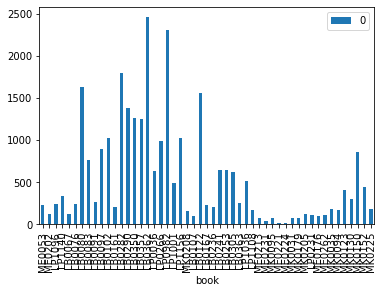

In [8]:
df_2.plot.bar()

In [22]:
file_all

['ME0053_000001',
 'ME0053_000002',
 'ME0053_000003',
 'ME0053_000004',
 'ME0053_000005',
 'ME0053_000006',
 'ME0053_000007',
 'ME0053_000008',
 'ME0053_000009',
 'ME0053_000010',
 'ME0053_000011',
 'ME0053_000012',
 'ME0053_000013',
 'ME0053_000014',
 'ME0053_000015',
 'ME0053_000016',
 'ME0053_000017',
 'ME0053_000018',
 'ME0053_000019',
 'ME0053_000020',
 'ME0053_000021',
 'ME0053_000022',
 'ME0053_000023',
 'ME0053_000024',
 'ME0053_000025',
 'ME0053_000026',
 'ME0053_000027',
 'ME0053_000028',
 'ME0053_000029',
 'ME0053_000030',
 'ME0053_000031',
 'ME0053_000032',
 'ME0053_000033',
 'ME0053_000034',
 'ME0053_000035',
 'ME0053_000036',
 'ME0053_000037',
 'ME0053_000038',
 'ME0053_000039',
 'ME0053_000040',
 'ME0053_000041',
 'ME0053_000042',
 'ME0053_000043',
 'ME0053_000044',
 'ME0053_000045',
 'ME0053_000046',
 'ME0053_000047',
 'ME0053_000048',
 'ME0053_000049',
 'ME0053_000050',
 'ME0053_000051',
 'ME0053_000052',
 'ME0053_000053',
 'ME0053_000054',
 'ME0053_000055',
 'ME0053_0

# Classifiy data based on book

In [9]:
# 책끼리 분류하기
dic_book = {}
for key_,value_ in fn_dic.items():
    values_ = [i.split("_")[0] for i in value_]
    for book_n in Counter(values_).keys():
        target_ = [i for i in value_ if i.split("_")[0] == book_n]
        dic_book[book_n] = [target_,key_]
    

In [10]:
dic_book["ME0053"][0]

['ME0053_000001',
 'ME0053_000002',
 'ME0053_000003',
 'ME0053_000004',
 'ME0053_000005',
 'ME0053_000006',
 'ME0053_000007',
 'ME0053_000008',
 'ME0053_000009',
 'ME0053_000010',
 'ME0053_000011',
 'ME0053_000012',
 'ME0053_000013',
 'ME0053_000014',
 'ME0053_000015',
 'ME0053_000016',
 'ME0053_000017',
 'ME0053_000018',
 'ME0053_000019',
 'ME0053_000020',
 'ME0053_000021',
 'ME0053_000022',
 'ME0053_000023',
 'ME0053_000024',
 'ME0053_000025',
 'ME0053_000026',
 'ME0053_000027',
 'ME0053_000028',
 'ME0053_000029',
 'ME0053_000030',
 'ME0053_000031',
 'ME0053_000032',
 'ME0053_000033',
 'ME0053_000034',
 'ME0053_000035',
 'ME0053_000036',
 'ME0053_000037',
 'ME0053_000038',
 'ME0053_000039',
 'ME0053_000040',
 'ME0053_000041',
 'ME0053_000042',
 'ME0053_000043',
 'ME0053_000044',
 'ME0053_000045',
 'ME0053_000046',
 'ME0053_000047',
 'ME0053_000048',
 'ME0053_000049',
 'ME0053_000050',
 'ME0053_000051',
 'ME0053_000052',
 'ME0053_000053',
 'ME0053_000054',
 'ME0053_000055',
 'ME0053_0

In [11]:
for key_,value_ in dic_book.items():
    book_com = []
    for book_ in value_[0]:
        book_com.append(globals() ["{}".format(book_)])
    globals ()["{}".format(key_)] = book_com      

In [12]:
print(ME0053[0])

[[BODY 1]]


서문 
신경계 질환에 대한 물리치료 중재는 임상에서 중요한 영역을 차지하고 있으며, 물리치료를 공부하는 학생은 반드시 알고 있어야 하는 중요한 교과목이다. 최근의 물리치료사 국가고시 체계는 임상 실무 중심의 교육과정 이수를 강조하고 있으며, 물리치료 임상 실무에 대한 문제해결 중심으로 변화되고 있다. 이 책의 구성은 한국보건의료인 국가시험원 물리치료사 국가고시를 준비하기 위해 반드시 알아야 할 기본적인 내용과 최신의 내용들을 반영하였다. 이 책의 구성은 먼저 신경계의 구조와 기능, 각 구조의 손상에 따른 임상 양상을 이해하기 위해 임상신경학을 설명하였다. 또 신경계 질환 중재의 기본적인 생리학적 기전과 치료적 원리를 설명하여 전반적으로 이해할 수 있도록 하였다. 마지막으로 신경계 질환을 뇌 관련 질환, 척수 관련 질환, 말초신경 관련 질환, 유전자결함 및 면역매개 관련 질환으로 구분하였고, 각 질환에 따라 정의, 발생빈도, 원인 및 병인, 분류 및 구분, 임상 양상을 이해하고 질환자의 진단평가과정을 통한 물리치료와 의학적 처지 및 관리의 중재로 구성하였다. 그러므로 이 책은 물리치료를 공부하는 학생들에게 신경계 질환에 대한 전반적인 이해와 질환에 따른 임상 양상을 알기 쉽게 이해하고, 환자의 문제점 파악 및 문제 목록을 작성하는 데 도움이 될 것이다. 신경계 질환의 임상 양상에 따른 문제해결을 위한 중재를 적용할 수 있도록 교육하는데 목적을 두고 있다. 이러한 과정을 통해 학생들은 신경계 질환의 문제점을 파악할 수 있게 될 것이며, 물리치료 임상의사결정을 통해 평가와 중재를 적용할 수 있고 체계적으로 학습하는 데 도움이 될 것이다.
“신경계질환 중재학 초판”이 출간되면서 물리치료과 학생들의 물리치료사 국가고시 대비를 위한 학습서로서 많은 도움이 되었으며, 임상 실무에서 신경계 질환의 이해와 신경계 질환의 임상 양상에 따른 문제를 해결하고 중재를 적용하는 데 도움이 되었다. 하지만 초판 집필 및 편집과정 중에 잘못 기술된 내용과 오류를 바

In [13]:
print(ME0202[0])

[[BODY 1]]


서문 preface
신경계 손상 환자뿐만 아니라 움직임 조절에 문제를 가진 환자들을 치료하는 물리치료사들은 일반적인 물리치료뿐만 아니라 운동 조절, 운동학습, 생역학, 뇌과학 등에 대한 이론을 공부해야 하고, 환자에게 적용할 수 있는 치료 기술을 습득하여야 합니다. 4차 산업 혁명의 시대가 되면서 물리치료 영역 또한 빠르게 변화되고 있지만 근본적인 이론이나 적용 방법은 변함이 없습니다. 따라서 기본에 충실하였을 때는 어떠한 변화나 요구에도 쉽게 적용될 수 있습니다. 그런 의미에서 이 책은 신경계 운동치료의 기본서가 되고자 합니다.
이 책은 임상물리치료사와 물리치료 국가고시를 준비하고 있는 학생들이 반드시 알아야 할 기본적인 운동치료 개념과 치료 원리, 임상 적용 방법 등의 내용을 이해하기 쉽게 사진, 그림, 표 등으로 구성하였습니다. 움직임을 더 잘 이해하기 위해 신경계의 운동조절을 설명하고 있으며, 신경계 손상 환자들의 움직임을 향상시키기 위한 운동학습 방법을 설명하고 있습니다. 또한 고전적인 치료인 브룬스트롬, 루드, 보바스, 보이타, 고유수용성 신경근 촉진법에 대한 역사적인 배경과 치료 개념을 이해할 수 있도록 설명하여 신경계 손상 환자들을 치료하는 물리치료사와 학생들에게 도움이 되고자 합니다.
신경계 운동치료학 교재가 발간되기까지 열정적이고 신중하게 원고작업에 임하여 주신 각 교수님들에게 감사를 드립니다. 편집에 수고하신 이재선부장님, 김호철부장님, 이경민차장님 출판사 관계자 분들과 사진 모델로 참여하신 양시은, 정동규 물리치료사와 장소를 제공해 주신 서태화 선생님에게도 진심으로 감사드립니다. 표지에 좋은 그림을 허락해주어서 학생들에게 조금이나마 문화생활을 할 수 있게 해 주신 권미화 선생님께도 감사드립니다.
신경계 운동치료의 발전을 위해 더 많은 관심을 가져 주시고 조언을 바랍니다.
2017년 12월
저자 일동
		


In [14]:
print(MK0208[0])

[[BODY 1]]


머리말

003

CHAPTER 01. TRANSPLANTATION IMMUNOLOGY

머리말

004

이것을 이루어 왔듯이 이 책의 작은 한 부분이라도 이식을 하고 있는 다른 선생

님들께 도움이 되기를 희망합니다.

우리나라의 장기이식이 세계 최고의 임상 성적과 연구 성적을 보여준다는 것은

부정할 수 없는 사실이 되어버렸습니다. 지금의 자리에 있기까지 수없이 많은

의료인의 희생과 노력이 있었고, 10년동안 10배 가까이 증가한 뇌사 기증자의

수가 보여주는 것처럼, 수많은 사람들이 타인의 목숨을 살리기 위해 기꺼이 장

기를 기증해 주셨습니다. 또한 자신과 가족의 목숨을 구하기 위해 많은 환자와

가족들이 자신의 생명을 맡겨 주셨기에 가능한 일이었습니다. 기증자와 환자분

들에게 고개 숙여 감사의 마음을 전합니다.

마지막으로 많은 일러스트레이션 작업을 진행해 준 유진수 임상강사와 김미승

연구원에게 지면을 통해 고마움을 전합니다.

2020년 봄을 기다리며

삼성서울병원 이식외과 교수 조재원
		


In [15]:
print(MK0095[0])

[[BODY 1]]


01 이상자궁출혈
1) 초기 접근
이상자궁출혈이 있으면 가장 먼저 자궁경부미란, 자궁경부용종, 자궁
내막용종, 자궁내막에 접하는 자궁근종, 점막하자궁근종 등의 기질적 요
인이 있는지 살펴야 한다. 간혹 점막하자궁근종 또는 자궁경부에서 기원한
근종이 자궁경부 밖으로 나와(prolapsed myoma) 출혈을 동반하는 경우가
있다.
약물 복용력도 살펴야 한다. 간혹 기질적 이상이 없더라도 아스피린,
와파린, 플라빅스 같은 항응고제 복용이나 근육에 스테로이드 주사를 받은
경우에 이상자궁출혈을 호소하는 경우가 있다.
폐경 전 여성이 경구피임제나 프로게스틴 제제를 복용할 때, levonorgestrelIUS(미레나®)를 삽입한 경우, 폐경 후 여성이 여성호르몬 치료를 할 때에
도 부작용 중의 하나로서 이상자궁출혈을 호소하는 경우가 있다.
이상자궁출혈을 호소하는 환자에서 만일 다량의 출혈이 있어 내진이나
질초음파검사가 힘든 경우에는 복부초음파검사로 자궁과 난소를 대략적으
로 검사한다. 이때 tranexamic acid(트란자민®) 500 mg bid 또는 medroxyprogesterone acetate(MPA)(프로베라®) 5~10 mg qd로 며칠간 처방하여 일
단 지혈을 도모한 다음 내진이나 질초음파를 하는 것도 좋은 방법이다. 급
성일 경우에는 tranexamic acid 500~1,000 mg을 정주하거나 프로게스테론
100~150 mg을 근주해도 된다.
PAP 검사는 ASCUS/AGUS 이상, HPV 양성, CIN, 자궁경부암에서 급
여가 되지만 자궁경부 출혈이나 자궁경부용종이 있는 경우도 급여가 된다.
혈액검사로 hemoglobin, platelet, coagulation panel, liver panel, renal
panel 등을 체크한다. 간 질환자, 신장 질환자에서 간혹 이상자궁출혈이
동반된다.
만일 초기 진찰에서 특별한 이상이 없는 경우 호르몬 이상으로 인한 자
궁출혈을 배제하기 위하여 혈중 TSH/prolactin 검사를 하

In [16]:
print(ME0213[0])

[[BODY 1]]


01
초음파 기본 원리와 영상의 이해
초음파의 개요
초음파란 무엇인가
인간이 들을 수 있는 가청 주파수는 20~20,000 Hz이고 이보다 높은 주파수의 음은 들을 수 없고 이를 초음파(ultrasound)라고 한다. 
자연계에서 초음파를 사용하는 동물은 박쥐와 돌고래가 있다. 박쥐나 돌고래는 인간이 들을 수 없는 높은 주파수의 초음파를 사용한다. 박쥐는 근거리의 물체를 높은 해상도로 관찰하기 위해 비교적 높은 주파수의 초음파를 이용하고 돌고래는 물속에서 비교적 멀리 있는 원거리 물체를 파악하기 위해서 비교적 낮은 주파수의 초음파를 사용한다. 
의학에서 진단에 사용하는 초음파는 2~20 MHz의 아주 높은 주파수의 초음파를 이용한다(1 MHz 5 1,000,000 Hz). 이 정도의 초음파는 공기를 잘 통과하지 못한다. 초음파 검사 시 피부 표면에 젤을 사용하여 공기를 피하고 초음파의 투과력을 높여야 한다. 
초음파의 응용
1. 초음파 영상의 원리
초음파 기계의 탐촉자(probe)는 전압을 가하면 진동자가 음파(acoustic wave)을 발생한다. 물체에서 되돌아오는 음파는 진동자에서 전압을 발생시킨다. 탐촉자에서 나온 초음파 beam은 체내를 통과하면서 투과, 산란, 흡수, 반사가 발생한다. 물체에서 반사된 초음파 beam이 탐촉자로 돌아와서 모니터에 영상을 만들게 된다. 강하게 반사된 초음파 beam은 고에코로 나타나고 반사가 되지 않는 경우에는 무에코(anechoic)로 나타난다. 초음파의 반사 정도에 따라서 무에코, 저에코, 등에코, 고에코, 강에코로 다양하게 나타나게 된다. 
초음파 검사는 초음파 beam이 물질을 통과시에 생기는 반사의 정도에 따른 음향 대조에 의한 영상으로 병변을 진단하는 기법이다. 따라서 물질이 딱딱하면 고에코, 부드러우면 저에코로 보이는 것이 아니다. 초음파 beam이 반사를 많이 하면 고에코, 통과가 잘 되어 반사가 적으면 저에코, 반사가 일어나지 않으면 무에코로 보이게 되는 것이다. 
2. 초음파 에

In [17]:
print(LP1096[0])

[[BODY 1]]


머리말
역사적으로 인류는 생존의 많은 부분을 동물에 의존해야 했고, 그러한 이
유로 동물들과 밀접한 관계를 맺어 왔습니다. 그러나 현대사회의 인간은 그 필
요성을 넘어 과도하게 동물을 이용, 착취하고 있으며, 동물에 대한 비윤리적인
대우와 학대는 끊임없이 발생하고 있습니다.
인간이 함께 살아가는 비인간동물을 어떻게 대해야 하는지에 대한 근본적
인 고민과 반성이 필요한 시점입니다. 생명체인 동물들을 가급적 이용하지 않
고, 어쩔 수 없이 이용하더라도 살아 있는 동안 본연의 습성에 따라 살 수 있도
록 하며, 생명을 빼앗아야 하더라도 인도적이고 고통을 최소화하는 방법으로
하여야 한다는 원칙은 유네스코의 세계 동물권리의 선언을 굳이 언급하지 않아
도 인간이 응당 갖추어야 할 윤리의식이라 할 것입니다.
한국의 동물보호법은 1991년 단 12개의 조문으로 제정되었다가 그때그때
의 사회적 이슈와 현실적 필요에 따라 조금씩 개정되어 왔고 47개 조문으로 이
루어진 지금의 모습에 이르렀습니다. 그동안 동물보호법은 다른 법률에 비하여
학문적, 학술적으로 큰 관심을 받지 못했던 것이 사실입니다. 그러나 최근 반려
인구가 크게 증가하고 동물을 둘러싼 분쟁과 학대범죄가 빈번히 발생하면서 동
물보호의 기본 법률이라 할 수 있는 동물보호법에 대한 질문과 개선 요구가 많
아지고 있습니다.
이에 저자들은 수년간의 동물권리 활동을 바탕으로, 법률가의 관점에서 동
물보호법을 해석하고, 올바른 입법 방향을 제시하기 위하여 본서를 집필하게
되었습니다. 본서는 동물보호법에 대한 전문적 지식을 접하고자 하는 법학도와
법조인을 주요 독자로 예정하고 있으나, 해당 분야에 종사하고 있는 다른 전문
가들과 실무가, 대중이 이해하기에도 큰 어려움이 없도록 하였습니다.

- 1 -
머리말

2 동물보호법 강의

저자들의 활동에 도움을 주시는 많은 분들에게 감사드리며, 미력하나마 본서
가 한국의 동물보호법과 동물권리. 복지의 발전에 기여할 수 있기를 소망합니다.

2020년 6월
저자 일

In [18]:
print(LB0067[0])

[[BODY 1]]


머 리 말
우리는 매일 방송이나 신문에서 금융시장에 대해 보도하는 것을 들으면서 산
다. ‘부동산 버블’이니, 미국 연방준비제도이사회에서 ‘금리’를 올렸다느니, 어느 
회사의 주식이 곤두박질했다느니, 미국이 ‘양적완화’를 했다느니 하는 말이 바로 
그것들이다. 우리는 현재 돈이 돈을 버는 ‘금융자본주의’ 시대에 살고 있다. 비록 
금융자본주의에 대한 비판적 시각이 존재하지만 이것이 전 세계로 전파되고 금
융혁신은 거듭되고 있다는 점은 부인할 수 없다.
그러나 정작 우리들은 금융에 대한 정확한 지식을 가지고 있지 않은 채 주식
에 투자하고, 펀드에 가입하거나 파생상품을 구입하는 등의 계약을 체결하기도 
한다. 은행이 무엇을 하는 금융기관인지, 펀드는 무엇인지, 파생상품은 도대체 무
엇이고 어떻게 거래되는지에 대해서 잘 모르면서 말이다. 필자가 강의를 시작하
기 전에 학생들로부터 강의에서의 바람을 묻고 들어보면 그들은 돈 거래를 하면
서 ‘사기’를 당하지 않는 방법을 가르쳐 주었으면 좋겠다는 말들을 한다. 그런 학
생들의 바라는 점을 알게 되면서 우리들이 금융기관과 올바르게 거래하려면 어
떻게 해야 하는지 그 방법과 관련된 법을 가르쳐야 한다는 생각이 앞섰다.
금융은 재테크의 하나로 돈을 굴려 더 큰 돈으로 만들어 주는 과학이 아니다. 
오히려 우리들이 살아가면서 어떠한 목표를 설정하고 그러한 목표를 이루는 데 
도움을 주는 과학이라고 해야 옳을 것 같다. 그 목표는 개인, 기업, 국가에 따라 
다를 수 있다.
금융관계법은 크게 ‘금융거래법’과 ‘금융법’으로 나누어 볼 수 있다. 금융거래
는 예컨대, 고객이 은행에 예금을 예치하거나 은행으로부터 돈을 꾸면서 자기 소
유의 부동산을 담보로 제공하는 것 같이 금융기관과 일반인들이 하는 금융거래
에 관한 법으로서 주로 민법, 기타 금융거래에 관한 특별법이 적용되는 분야이
다. 한편, 이 책에서 다루고자 하는 주제는 위와 같은 금융거래를 원활하게 하는 
하부구조로서의 금융법 즉, 이것을 쉽게 풀면 

In [19]:
print(LB0363[0])

[[BODY 1]]


이번에 󰡔간추린 신형사소송법 제9판󰡕을 출간하면서 2016년 말까지 공간되었거나 지상
에 보도되었던 주요 판례들을 소개한 바가 있다. 󰡔판례분석 신형사소송법 증보판󰡕으로 
이름 붙인 본서는 2015년 󰡔간추린 신형사소송법 제7판󰡕을 출간할 때 함께 분석·정리하
였던 󰡔판례분석 신형사소송법 󰡕의 판례들에 2016년 말까지의 새로운 판례들과 보완의 
필요를 느꼈던 일부 판례들을 추가하여 분석 정리해 놓은 것이다. 󰡔판례분석 신형사소송
법 증보판󰡕을 출간하면서 저자는 약간의 변화를 시도하였다. 그 계기는 다음과 같다. 
2007년 전면 개정된 신형사소송법의 시행을 전후로 하여 형사소송법의 규율체계에 많
은 변화가 있었다. 특히 위법수집증거배제법칙의 도입으로 대표되는 증거법의 영역에서 
그 변화는 현저한 바가 있었다. 이후 각종 성범죄가 비친고죄에서 친고죄로 전환됨에 따
라 고소와 관련된 판례들의 의미도 크게 변화하였다. 그러나 이와 같은 변화에도 불구하
고 소송물 이론, 확정판결의 효력범위 등 기존의 법리와 판례들이 여전히 유지되는 영역
들도 적지 않다. 이러한 분야들에서는 󰡔판례분석 신형사소송법 󰡕 또는 󰡔판례분석 신형
사소송법 증보판󰡕에 수록된 판례들이 여전히 중요한 의미를 가지고 있다.
그런데 독자의 입장에서는 󰡔판례분석 신형사소송법󰡕의 , , 세 권을 전부 구입한
다는 것이 쉽지 않은 일이다. 이러한 사정을 고려하여 저자는 처음에 출간되었던 󰡔판례분
석 신형사소송법 󰡕과 그 뒤를 이어서 나왔던 󰡔판례분석 신형사소송법 증보판󰡕을 
PDF파일로 전환하여 법문사 홈페이지 자료실에 올려놓기로 하였다. 그 결과 󰡔판례분석 
신형사소송법 증보판󰡕은 󰡔판례분석 신형사소송법 증보판󰡕 간행 이후 2016년 말까
지의 판례를 소개하는 최신 판례집으로서의 의미를 가지게 되었다.
이제 독자들로서는 󰡔간추린 신형사소송법 제9판󰡕의 본문에 소개된 판례들을 󰡔판례분석 
신형사소송법 󰡕과 󰡔판례분석 신형사소송법 증보판󰡕의 PDF파일 및 본서 󰡔판례분석 
신형사소송

### 길이관련 shortest 
- Lenght of (ME0221) = 14 / 
- Lenght of (ME0224) = 21 / 


In [22]:
print(ME0221[10])

[[BODY 11]]


 
1.	Lateral epicondyle 
2.	Common extensor tendon origin 
3.	Radial head 
5. Medial longitudinal
 
스캔 방법
Common flexor tendon이 extensor tendon보다 잘 보인다. Tendon origin 부위의 epicondyle의 bony contour가 sharp하고 regular하다. Inflammatory enthesopathy가 생기면 common flexor tendon의 origin 부위에 cortical erosion이 생길 수 있다.
 
1.	Medial epicondyle 
2.	Common flexor tendon origin 
3.	Coronoid process of ulna 
4.	Arrows: Anterior band of ulnar collateral ligament 
6. Posterior longitudinal
 
 Posterior longitudinal view에서 effusion은 joint cleft에서 보다는 olecranon fossa에서 가장 잘 보인다. 이 view를 찍어보면 fluid나 synovial tissue가 olecranon fossa를 꽉 채우게 되면 elbow가 어떻게 full extension이 잘 안 되는지를 알 수 있게 해 준다.
 
1.	Triceps tendon 
2.	Olecranon process 
3.	Olecranon fossa 
4.	Joint cleft 
5.	Fat pad 
7. Posterior transverse
 
 Posterior transverse scan을 하기 위해서는, 앉은 자세에서 hand를 hip이나 thigh 혹은 검사 테이블 위에 올려놓고 elbow를 90° 구부리고 humerus를 internal rotation하면 된다.
 
1.	Olecranon fossa 
2.	Medial epicondyle 
3.	Lateral epicondyle

In [23]:
print(ME0221[10])

[[BODY 11]]


 
1.	Lateral epicondyle 
2.	Common extensor tendon origin 
3.	Radial head 
5. Medial longitudinal
 
스캔 방법
Common flexor tendon이 extensor tendon보다 잘 보인다. Tendon origin 부위의 epicondyle의 bony contour가 sharp하고 regular하다. Inflammatory enthesopathy가 생기면 common flexor tendon의 origin 부위에 cortical erosion이 생길 수 있다.
 
1.	Medial epicondyle 
2.	Common flexor tendon origin 
3.	Coronoid process of ulna 
4.	Arrows: Anterior band of ulnar collateral ligament 
6. Posterior longitudinal
 
 Posterior longitudinal view에서 effusion은 joint cleft에서 보다는 olecranon fossa에서 가장 잘 보인다. 이 view를 찍어보면 fluid나 synovial tissue가 olecranon fossa를 꽉 채우게 되면 elbow가 어떻게 full extension이 잘 안 되는지를 알 수 있게 해 준다.
 
1.	Triceps tendon 
2.	Olecranon process 
3.	Olecranon fossa 
4.	Joint cleft 
5.	Fat pad 
7. Posterior transverse
 
 Posterior transverse scan을 하기 위해서는, 앉은 자세에서 hand를 hip이나 thigh 혹은 검사 테이블 위에 올려놓고 elbow를 90° 구부리고 humerus를 internal rotation하면 된다.
 
1.	Olecranon fossa 
2.	Medial epicondyle 
3.	Lateral epicondyle

In [51]:
print(ME0224[0])

[[BODY 1]]


01
지방간
fatty liver
지방간(fatty liver)은 중성 지방이 간에 이상적으로 증량, 축적된 상태이다. 
조직학적으로 간소엽의 30% 이상에 걸쳐서 간세포에 지방이 축적된 상태이다. 
원인의 대부분이 비만, 고지혈증과 당뇨병 등의 생활 습관병, 알코올성 과음에 기인한다. 


간실질과 신피질(kidney cortex)의 에코가 비슷하여 지방간이 없는 정상 간실질의 상태이다. 또한 문맥 혈관벽이 분명하게 관찰된다. 
지방간(fatty liver)의 분류
경도 지방간 - 실피질(kidney cortex)보다 증가된 간실질 에코 
중등도 지방간 - 문맥 혈관의 벽이 잘 구분되지 않는다. 
고도 지방간 - 에코 감쇠가 많아 횡격막의 에코가 불명료해진다. 

01
경도 지방간
mild fatty liver


좌측 사진은 신피질(kidney cortex)에 비해 간실질의 에코가 증가되어 보여 지방간이 있다고 생각된다. 
우측 사진은 간우엽의 전면부를 촬영한 사진인데, 간문맥벽 에코(화살표)가 비교적 잘 관찰된다. 경도의 지방간(mild fatty liver)으로 생각된다. 


좌측 사진은 신피질(kidney cortex)에 비해 간실질의 에코가 증가되어 보여 지방간이 있다고 생각된다. 
우측 사진은 간내에 간문맥 벽 에코(화살표)가 비교적 잘 관찰된다. 이를 토대로 경도의 지방간(mild fatty liver)으로 판정하였다. 


좌측 사진은 신피질(kidney cortex)에 비해 간실질의 에코가 증가되어 보여 지방간이 있다고 생각된다. 
우측 사진은 간우엽의 전면을 촬영한 사진이다. 간문맥(화살표)의 에코가 비교적 잘 관찰되고, 횡격막의 에코도 뚜렷이 관찰되고 간실질 에코의 심부 감쇠가 거의 없다. 


좌측 사진은 신피질(kidney cortex)에 비해 간실질의 에코가 증가되어 보이며, 간실질의 에코가 조잡하다. 만성 간질환(chronic liver disease)이 동반되어 있을 것으로 추정된다. 
우측 사진은 간우엽

### 길이관련 longest 
- Lenght of (LB0362) = 2460 / 

In [26]:
print(LB0362[120])

[[BODY 3]]

 따라서 경찰관이 그 의무위반행위로서 동행요구 상대
1) 1993. 11. 23. 93다35155, 공 1994, 185 = 󰡔권리 불고지 수사관 사건󰡕. 2) 불법한 임의동행의 문제에 대해서는, 후술 235면 이하 참조.
   
  186제2편수 사
방을 비롯하여 다른 사람에게 해를 끼친 경우에는 그 경찰관은 1년 이하의 징역이나 금고 로 처벌된다(동법12).
동행요구에 의한 동행을 한 경우에 경찰관은 당해인을 6시간을 초과하여 경찰관서에 머물게 할 수 없다(경집법36).1) 그 이상을 초과하는 동행은 신체구속에 해당하며 이는 형 사소송에 관한 법률에 의하지 아니하고는 허용되지 않기 때문이다(동법37, 법1991 단서). 제한시간을 초과하는 동행요구에 의한 동행은 불법체포·불법감금죄(형법124)에 해당할 수 있으며 범죄성립이 인정될 경우 당해 경찰관은 7년 이하의 징역과 10년 이하의 자격정지 로 처벌받게 된다. 동행요구에 의하여 연행된 상대방은 변호인과의 접견교통권을 행사할 수 있다.2)
(3) 흉기소지검사
(가) 흉기소지검사의 의의와 필요성   경찰관은 거동수상자에 대하여 질문을 할 때 흉기의 소지 여부를 조사할 수 있다(동법33). 흉기소지검사는 거동수상자의 의복이나 휴대품을 가볍게 손으로 만지면서 혐의물품의 존부를 확인하고 흉기소지의 혐의가 있는 경우 상대방으로 하여금 이를 제출하게 하거나 또는 경찰관이 직접 이를 꺼내는 조사방법 이다.
흉기소지를 검사하기 위한 조사는 상대방의 의복이나 손가방 등의 휴대품에 한정되며 잠금장치가 되어 있는 물품이나 조사받는 사람의 직접적인 접촉범위 내에 존재하지 않는 물건에 대해서는 소지품검사를 할 수 없다고 볼 것이다. 이는 흉기발견을 위한 소지품검 사가 원칙적으로 공무를 수행하는 경찰관의 생명과 신체의 안전을 도모하기 위하여 인정 된 것이기 때문이다. 한편 범죄혐의 있음을 전제로 하는 흉기소지검사는 증거물의 발견도 부차적인 목적으로 삼고 있다.
(나) 흉기소지검사의 한계   우리 「경찰관직무집행

# Combine data based on book

In [62]:
dic_combine = {}
for key_,value_ in dic_book.items():
    book_n = key_
    date_ = value_[1]
    fn_list = value_[0]
    original_all = []
    for fn_ in fn_list:
        fn_s = globals ()["{}".format(fn_)].splitlines()
        # Rule 2: # strip \t, \xa0 관련 제거하기
        origi_ = [i.strip().replace("\t"," ").replace("\xa0","") for i in fn_s ]
        # 2줄이상 (문단구분)
        origi_ = re.sub(' {2,}','  ', " ".join(origi_))
        original_all.append([date_,fn_,origi_])
    dic_combine[book_n] = original_all

In [63]:
dic_combine["ME0053"][2]#.split("  ")

['20220902',
 'ME0053_000003',
 '[[BODY 2]]  대뇌의 엽 대뇌겉질의 주요엽은 이마엽(frontal lobe), 마루엽(parietal lobe), 관자엽(temporal lobe), 뒤통수엽(occipital lobe)으로 구분되며, 그 외에도 둘레계통의 둘레엽과 마루엽과 관자엽에 덮여 있는 섬엽(insula)으로 구분할 수 있다. 그림 1.3은 각 엽의 특별한 기능을 기술하고 있으며 이러한 엽들의 손상은 각각의 고유의 장애를 초래한다. 운동과 감각 겉질 운동과 감각에 관여하는 겉질의 중심앞이랑과 중심뒤이랑은 영역에 따라 신체의 특정부위를 움직이거나 특정부위에서 감각을 느끼도록 한다. 그림 1.4A는 뇌의 신체부위의 움직임에 따른 대뇌겉질에서 활성화되는 영역에 대한 기능적 자기공명영상(functional magnetic resonance imaging, fMRI)이다. 이 특정부위와 관련한 영역들의 지도를 그려보면 난쟁이 모습과 비슷하여 뇌의 난쟁이(homunculus)라고 한다. 감각과 운동 난쟁이의 특징은 입술과 혀, 인후두, 손가락, 얼굴에 해당하는 겉질영역이 아주 넓다는 것이다(그림 1.4B). 대뇌반구의 편측화 대뇌반구에 따른 기능의 편측화는 대뇌다리를 외과적으로 분할한 실험에서 오른쪽 대뇌반구와 왼쪽 대뇌반구의 기능적 차이가 있다. 왼쪽 대뇌반구는 언어, 계산, 추론, 분석적 사고와 관련되고 오른쪽 대뇌반구는 공간적 위치관계, 미술, 음악, 감정, 직관과 관련된다(그림 1.5). 대뇌 손상 각각의 대뇌겉질영역의 국한된 병변은 드물지만 운동영역에 병변이 생기면 손상된 특정영역의 반대편 몸의 수의적 운동마비, 행위상실증(실행증, apraxia), 운동못함(운동불능, akinesia), 눈운동 장애 등과 같은 위운동신경세포 증후군이 나타난다. 감각영역에 병변이 생기면 손상된 특정영역의 반대편에 일반감각과 특수감각 장애, 인식불능(agnosia), 무시증후군(neglect syndrome) 등이 나타난다. 대뇌반구의 손상에

In [65]:
dic_combine["ME0053"][0]#[2].split("  ")

['20220902',
 'ME0053_000001',
 '[[BODY 1]]  서문 신경계 질환에 대한 물리치료 중재는 임상에서 중요한 영역을 차지하고 있으며, 물리치료를 공부하는 학생은 반드시 알고 있어야 하는 중요한 교과목이다. 최근의 물리치료사 국가고시 체계는 임상 실무 중심의 교육과정 이수를 강조하고 있으며, 물리치료 임상 실무에 대한 문제해결 중심으로 변화되고 있다. 이 책의 구성은 한국보건의료인 국가시험원 물리치료사 국가고시를 준비하기 위해 반드시 알아야 할 기본적인 내용과 최신의 내용들을 반영하였다. 이 책의 구성은 먼저 신경계의 구조와 기능, 각 구조의 손상에 따른 임상 양상을 이해하기 위해 임상신경학을 설명하였다. 또 신경계 질환 중재의 기본적인 생리학적 기전과 치료적 원리를 설명하여 전반적으로 이해할 수 있도록 하였다. 마지막으로 신경계 질환을 뇌 관련 질환, 척수 관련 질환, 말초신경 관련 질환, 유전자결함 및 면역매개 관련 질환으로 구분하였고, 각 질환에 따라 정의, 발생빈도, 원인 및 병인, 분류 및 구분, 임상 양상을 이해하고 질환자의 진단평가과정을 통한 물리치료와 의학적 처지 및 관리의 중재로 구성하였다. 그러므로 이 책은 물리치료를 공부하는 학생들에게 신경계 질환에 대한 전반적인 이해와 질환에 따른 임상 양상을 알기 쉽게 이해하고, 환자의 문제점 파악 및 문제 목록을 작성하는 데 도움이 될 것이다. 신경계 질환의 임상 양상에 따른 문제해결을 위한 중재를 적용할 수 있도록 교육하는데 목적을 두고 있다. 이러한 과정을 통해 학생들은 신경계 질환의 문제점을 파악할 수 있게 될 것이며, 물리치료 임상의사결정을 통해 평가와 중재를 적용할 수 있고 체계적으로 학습하는 데 도움이 될 것이다. “신경계질환 중재학 초판”이 출간되면서 물리치료과 학생들의 물리치료사 국가고시 대비를 위한 학습서로서 많은 도움이 되었으며, 임상 실무에서 신경계 질환의 이해와 신경계 질환의 임상 양상에 따른 문제를 해결하고 중재를 적용하는 데 도움이 되었다. 하지만 초

# Split data into paragraph

In [72]:
data_all = []
for key_,value_ in dic_combine.items():
    book_n = key_
    for infor_ in value_:
        #print(infor_)
        #break
        date_ = infor_[0]
        split_n = infor_[1]
        paras_ = infor_[2].split("  ")
        data_all.append([book_n,date_,split_n,paras_])
df_ = pd.DataFrame(data_all).rename(columns={0:"book",1:"date",2:"split_file",3:"paragraphs"})
df_.head()

,book,date,split_file,paragraphs
0,ME0053,20220902,ME0053_000001,"[[[BODY 1]], 서문 신경계 질환에 대한 물리치료 중재는 임상에서 중요한 영..."
1,ME0053,20220902,ME0053_000002,"[[[BODY 2]], 01 임상신경학 Clinical neurology, Keyw..."
2,ME0053,20220902,ME0053_000003,"[[[BODY 2]], 대뇌의 엽 대뇌겉질의 주요엽은 이마엽(frontal lobe..."
3,ME0053,20220902,ME0053_000004,"[[[BODY 2]], 바닥핵 손상 바닥핵의 일부 또는 전부가 손상되면 경축(rig..."
4,ME0053,20220902,ME0053_000005,"[[[BODY 2]], 그물구성체 활성계의 활성은 각성을 촉진하는 한편 그물구성체의..."


In [74]:
df_.to_excel(r"C:\Users\Samsung\jupyter\Project_Medical_Legal\toss\1111\data_splited_para.xlsx")

In [ ]:
    reg = re.compile(" {2,}|.+?다[.]|.*?[)][.]")
    or_ = reg.findall(original_all)

In [ ]:
for key_,value_ in fn_dic.items():
    fn_list = value_
    original_all = []
    for fn_ in fn_list:
        fn_s = globals ()["{}".format(fn_)].splitlines()
        # Rule 2: # strip \t, \xa0 관련 제거하기
        origi_ = [i.strip().replace("\t"," ").replace("\xa0","") for i in fn_s ]
        original_all.extend(origi_)
    original_all = re.sub(' {2,}','  ', " ".join(original_all))
    reg = re.compile(" {2,}|.+?다[.]|.*?[)][.]")
    or_ = reg.findall(original_all)
    or_all = []
    for i in or_:
        tar_ = ")."
        if tar_ in i:
            can_ = i.split(tar_)
            can_2 = [i2 +tar_ for i2 in can_[:-1]]
            can_2.append(can_[-1])
            or_all.extend(can_2)
        else:
            or_all.append(i)
    or_all = list(map(lambda x: x.strip() if x != "  " else "  ",or_all))